# Questions:
How have the trends in officer-involved shootings **in Phoenix** evolved **since the emergence of the George Flyod incident in 2020**?


*   How has the frequency of officer-involved shootings changed?
*   Is there a correlation between the demographic characteristics (race, age, gender) of individuals involved in officer-involved shootings and the outcome (fatal vs. non-fatal)?
*   Are there temporal patterns in the occurrence of officer-involved shootings?
*   What are the primary weapons used by individuals involved in officer-involved shootings?

# Articles:


1.   Cesario, J., Johnson, D. J., & Terrill, W. (2019). Is There Evidence of Racial Disparity in Police Use of Deadly Force? Analyses of Officer-Involved Fatal Shootings in 2015–2016. Social Psychological & Personality Science, 10(5), 586–595. https://doi.org/10.1177/1948550618775108
*   Cesario et al.'s examination of evidence regarding racial disparities in police use of deadly force provides context for interpreting findings related to race and fatality outcomes in OIS incidents.
2.   Jennings, J. T., & Rubado, M. E. (2017). Preventing the Use of Deadly Force: The Relationship between Police Agency Policies and Rates of Officer-Involved Gun Deaths. Public Administration Review, 77(2), 217–226. https://doi.org/10.1111/puar.12738
*   Jennings and Rubado's study on police agency policies and OIS rates informed the consideration of incident characteristics in the analysis

3.   Tregle, B., Nix, J., & Alpert, G. P. (2019). Disparity does not mean bias: making sense of observed racial disparities in fatal officer-involved shootings with multiple benchmarks. Journal of Crime & Justice, 42(1), 18–31. https://doi.org/10.1080/0735648X.2018.1547269
*   Tregle et al.'s research on racial disparities in OIS highlighted the importance of accounting for demographic factors like race and ethnicity, guiding the examination of demographic distributions within the data.





In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [3]:
ois = pd.read_csv('OISPhoenix.csv')

In [4]:
print(ois)

     _id                 DATE    TIME  HOUR     DAY_OF_WEEK           MONTH  \
0      1  2017-01-09T00:00:00  1538.0  15.0     01 - Monday    01 - January   
1      2  2017-01-09T00:00:00  1538.0  15.0     01 - Monday    01 - January   
2      3  2017-03-02T00:00:00  1645.0  16.0   04 - Thursday      03 - March   
3      4  2017-03-15T00:00:00  1347.0  13.0  03 - Wednesday      03 - March   
4      5  2017-03-15T00:00:00  1347.0  13.0  03 - Wednesday      03 - March   
..   ...                  ...     ...   ...             ...             ...   
263  264  2023-09-09T00:00:00  2017.0  20.0   06 - Saturday  09 - September   
264  265  2023-09-09T00:00:00  2017.0  20.0   06 - Saturday  09 - September   
265  266  2023-09-09T00:00:00  2017.0  20.0   06 - Saturday  09 - September   
266  267  2023-11-20T00:00:00   248.0   2.0     01 - Monday   11 - November   
267  268  2023-12-16T00:00:00  1431.0  14.0   06 - Saturday   12 - December   

     QUARTER  YEAR       INC_RPT                   

In [43]:
ois.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   _id              268 non-null    int64         
 1   DATE             268 non-null    datetime64[ns]
 2   TIME             267 non-null    float64       
 3   HOUR             267 non-null    float64       
 4   DAY_OF_WEEK      268 non-null    object        
 5   MONTH            268 non-null    object        
 6   QUARTER          268 non-null    int64         
 7   YEAR             268 non-null    int64         
 8   INC_RPT          268 non-null    object        
 9   PRECINCT         268 non-null    object        
 10  COUNCIL_DIST     268 non-null    object        
 11  LOCATION         268 non-null    object        
 12  SP_WEAPON        268 non-null    object        
 13  SP_INJURY_LEVEL  268 non-null    object        
 14  FATALITY_FLG     268 non-null    object   

In [44]:
ois.describe()

,_id,TIME,HOUR,QUARTER,YEAR,SP_AGE_AT_INC,REFERENCE_ID,SP_NUM,Year,Month
count,268.000000,267.000000,267.000000,268.000000,268.000000,266.000000,267.000000,268.000000,268.000000,268.000000
mean,134.500000,1335.142322,13.052434,2.410448,2019.817164,35.116541,9209.700375,1.007463,2019.817164,6.328358
std,77.509139,686.028438,6.835133,1.078997,1.983113,11.947588,1528.756635,0.086225,1.983113,3.412416
min,1.000000,3.000000,0.000000,1.000000,2017.000000,14.000000,4862.000000,1.000000,2017.000000,1.000000
25%,67.750000,780.000000,7.500000,2.000000,2018.000000,26.000000,8372.000000,1.000000,2018.000000,4.000000
50%,134.500000,1539.000000,15.000000,2.000000,2020.000000,34.000000,9687.000000,1.000000,2020.000000,6.000000
75%,201.250000,1939.500000,19.000000,3.000000,2022.000000,42.000000,10365.500000,1.000000,2022.000000,9.000000
max,268.000000,2353.000000,23.000000,4.000000,2023.000000,77.000000,11643.000000,2.000000,2023.000000,12.000000


In [57]:
ois.isnull().sum()

_id                0
DATE               0
TIME               1
HOUR               1
DAY_OF_WEEK        0
MONTH              0
QUARTER            0
YEAR               0
INC_RPT            0
PRECINCT           0
COUNCIL_DIST       0
LOCATION           0
SP_WEAPON          0
SP_INJURY_LEVEL    0
FATALITY_FLG       0
SP_GENDER          0
SP_ETHNICITY       0
SP_RACE            0
SP_AGE_AT_INC      2
SP_AGE_GROUP       0
PO_RACE            1
PO_ETHNICITY       0
REFERENCE_ID       1
SP_NUM             0
Year               0
Month              0
dtype: int64

In [18]:
# variables for trend per year
ois['DATE'] = pd.to_datetime(ois['DATE'])
ois['Year'] = ois['DATE'].dt.year
ois['Month'] = ois['DATE'].dt.month
shootings_per_year = ois.groupby('Year').size()

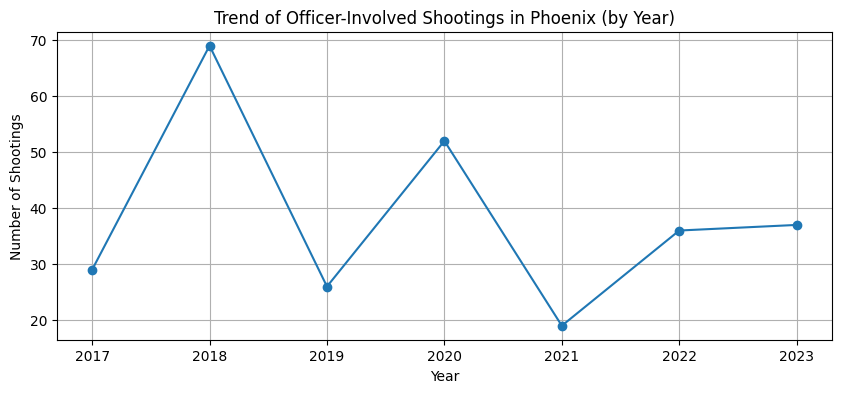

In [17]:
# plot the trend from 2017-2023 per year
plt.figure(figsize=(10, 4))
plt.plot(shootings_per_year.index, shootings_per_year.values, marker='o', linestyle='-')
plt.title('Trend of Officer-Involved Shootings in Phoenix (by Year)')
plt.xlabel('Year')
plt.ylabel('Number of Shootings')
plt.grid(True)
plt.show()

In [14]:
# variables for demographic analysis
demographic_columns = ['SP_GENDER', 'SP_ETHNICITY', 'SP_RACE', 'SP_AGE_GROUP']
demographic_analysis = ois[demographic_columns].value_counts()

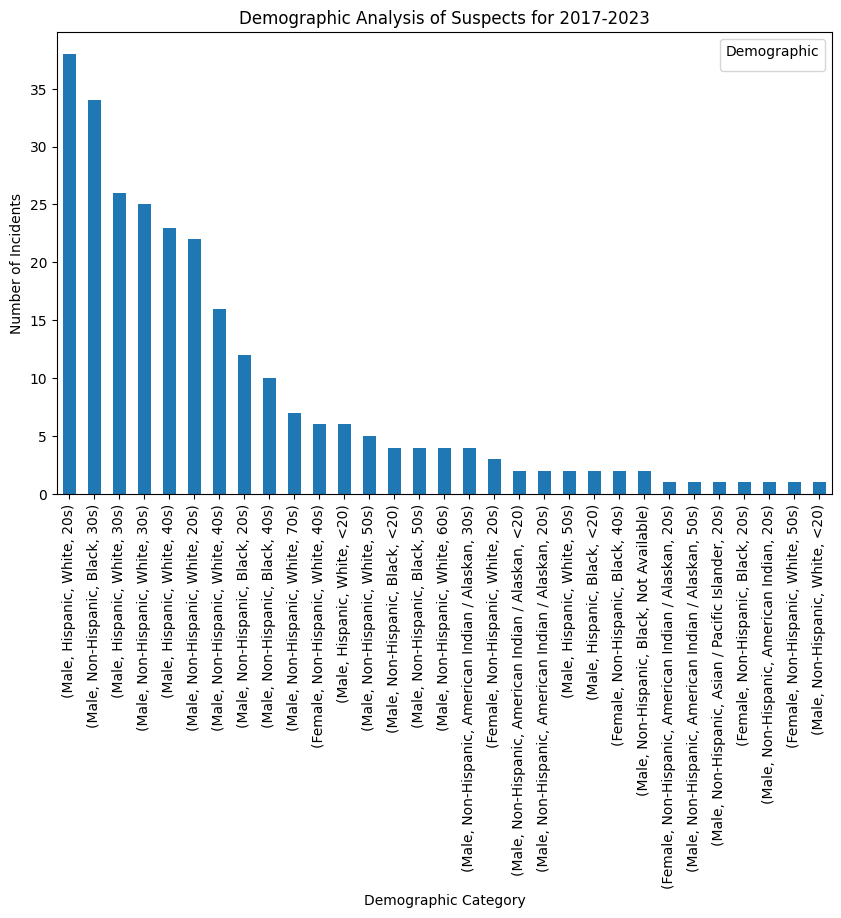

In [16]:
# plotting the demographic distribution of individuals involved in shootings 2017-2023
plt.figure(figsize=(10, 6))
demographic_analysis.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Demographic Analysis of Suspects for 2017-2023')
plt.xlabel('Demographic Category')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)
plt.legend(title='Demographic')
plt.show()

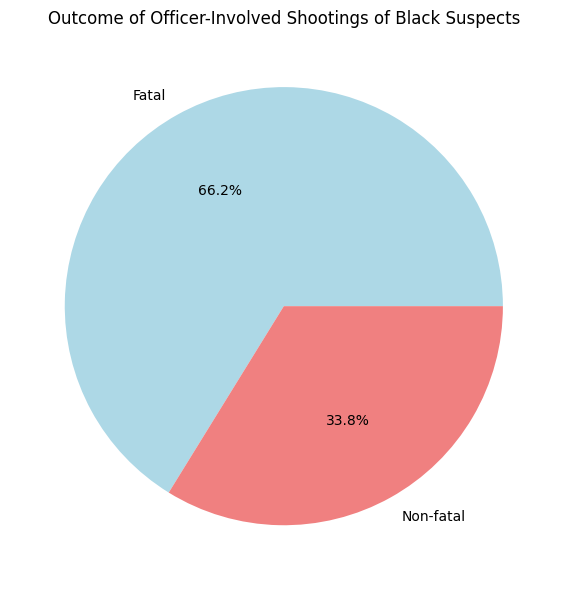

In [37]:
# plotting fatal vs non-fatal for black suspects
black_suspects = ois[ois['SP_RACE'] == 'Black']
outcome_analysis_blksp = black_suspects['FATALITY_FLG'].value_counts()

plt.figure(figsize=(6, 6))
outcome_analysis_blksp.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Outcome of Officer-Involved Shootings of Black Suspects')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [8]:
# extracting data for 2020 & 2023
ois['DATE'] = pd.to_datetime(ois['DATE'])
ois_2020 = ois[ois['DATE'].dt.year == 2020]
ois_2023 = ois[ois['DATE'].dt.year == 2023]

In [26]:
ois_2020.isnull().sum()

_id                0
DATE               0
TIME               1
HOUR               1
DAY_OF_WEEK        0
MONTH              0
QUARTER            0
YEAR               0
INC_RPT            0
PRECINCT           0
COUNCIL_DIST       0
LOCATION           0
SP_WEAPON          0
SP_INJURY_LEVEL    0
FATALITY_FLG       0
SP_GENDER          0
SP_ETHNICITY       0
SP_RACE            0
SP_AGE_AT_INC      1
SP_AGE_GROUP       0
PO_RACE            0
PO_ETHNICITY       0
REFERENCE_ID       0
SP_NUM             0
Year               0
Month              0
dtype: int64

In [27]:
ois_2023.isnull().sum()

_id                0
DATE               0
TIME               0
HOUR               0
DAY_OF_WEEK        0
MONTH              0
QUARTER            0
YEAR               0
INC_RPT            0
PRECINCT           0
COUNCIL_DIST       0
LOCATION           0
SP_WEAPON          0
SP_INJURY_LEVEL    0
FATALITY_FLG       0
SP_GENDER          0
SP_ETHNICITY       0
SP_RACE            0
SP_AGE_AT_INC      0
SP_AGE_GROUP       0
PO_RACE            0
PO_ETHNICITY       0
REFERENCE_ID       0
SP_NUM             0
Year               0
Month              0
dtype: int64

In [41]:
print('2020 Descriptive Info:', '\n', ois_2020.describe())

2020 Descriptive Info: 
               _id         TIME       HOUR    QUARTER    YEAR  SP_AGE_AT_INC  \
count   52.000000    51.000000  51.000000  52.000000    52.0      51.000000   
mean   150.500000  1313.686275  12.843137   3.134615  2020.0      31.666667   
std     15.154757   825.435243   8.178930   1.066952     0.0       9.848181   
min    125.000000    15.000000   0.000000   1.000000  2020.0      15.000000   
25%    137.750000   407.000000   4.000000   2.000000  2020.0      25.000000   
50%    150.500000  1750.000000  17.000000   4.000000  2020.0      30.000000   
75%    163.250000  2047.000000  20.000000   4.000000  2020.0      39.000000   
max    176.000000  2253.000000  22.000000   4.000000  2020.0      55.000000   

       REFERENCE_ID     SP_NUM    Year      Month  
count     52.000000  52.000000    52.0  52.000000  
mean    9716.634615   1.038462  2020.0   8.596154  
std     1357.119571   0.194184     0.0   3.315203  
min     5550.000000   1.000000  2020.0   1.000000  
25%

In [42]:
print('2023 Descriptive Info:', '\n', ois_2023.describe())

2023 Descriptive Info: 
               _id         TIME       HOUR    QUARTER    YEAR  SP_AGE_AT_INC  \
count   37.000000    37.000000  37.000000  37.000000    37.0      37.000000   
mean   250.000000  1595.459459  15.567568   1.918919  2023.0      37.918919   
std     10.824355   537.371669   5.377631   0.893755     0.0      13.077501   
min    232.000000   248.000000   2.000000   1.000000  2023.0      21.000000   
25%    241.000000  1445.000000  14.000000   1.000000  2023.0      29.000000   
50%    250.000000  1733.000000  17.000000   2.000000  2023.0      37.000000   
75%    259.000000  2017.000000  20.000000   2.000000  2023.0      40.000000   
max    268.000000  2052.000000  20.000000   4.000000  2023.0      76.000000   

       REFERENCE_ID  SP_NUM    Year      Month  
count     37.000000    37.0    37.0  37.000000  
mean   10068.594595     1.0  2023.0   4.837838  
std     1021.236192     0.0     0.0   2.813791  
min     6999.000000     1.0  2023.0   1.000000  
25%     9576.00000

In [9]:
# variables for demographic analysis for 2020 & 2023
demographic_columns = ['SP_GENDER', 'SP_ETHNICITY', 'SP_RACE', 'SP_AGE_GROUP']
demographic_analysis_2020 = ois_2020[demographic_columns].value_counts()
demographic_analysis_2023 = ois_2023[demographic_columns].value_counts()

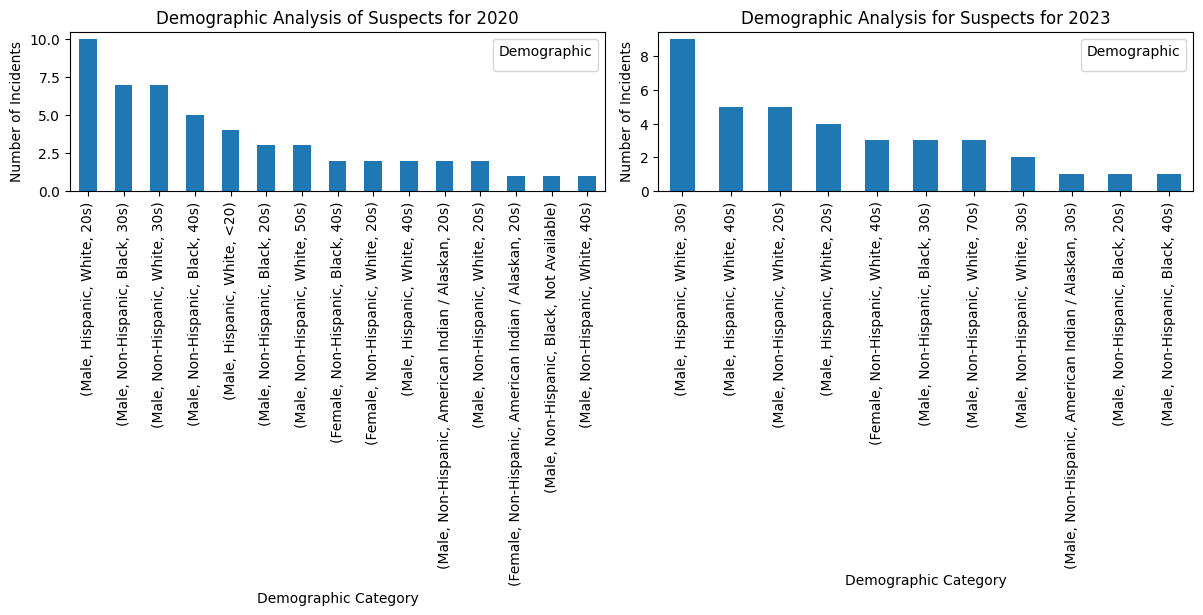

In [79]:
# plotting demographics for 2020 & 2023
plt.figure(figsize=(12, 8))

# 2020
plt.subplot(2,2,1)
demographic_analysis_2020.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Demographic Analysis of Suspects for 2020')
plt.xlabel('Demographic Category')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)
plt.legend(title='Demographic')

# 2023
plt.subplot(2,2,2)
demographic_analysis_2023.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Demographic Analysis for Suspects for 2023')
plt.xlabel('Demographic Category')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)
plt.legend(title='Demographic')

plt.tight_layout()
plt.show()

In [10]:
# variables for characteristics of incidents for 2020 & 2023
incident_analysis20 = ois_2020[['PRECINCT', 'SP_WEAPON', 'FATALITY_FLG']]
incident_analysis23 = ois_2023[['PRECINCT', 'SP_WEAPON', 'FATALITY_FLG']]

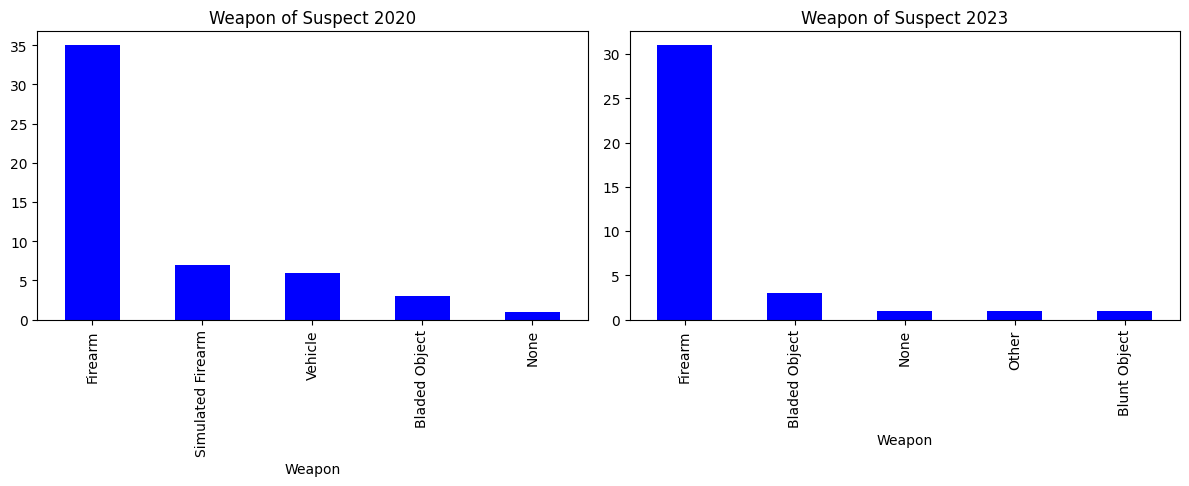

In [40]:
# plotting Suspect Weapon for 2020 & 2023
plt.figure(figsize=(12, 8))

# 2020
plt.subplot(2, 2, 1)
incident_analysis20['SP_WEAPON'].value_counts().plot(kind='bar', color='blue')
plt.title('Weapon of Suspect 2020')
plt.xlabel('Weapon')

# 2023
plt.subplot(2, 2, 2)
incident_analysis23['SP_WEAPON'].value_counts().plot(kind='bar', color='blue')
plt.title('Weapon of Suspect 2023')
plt.xlabel('Weapon')

plt.tight_layout()
plt.show()

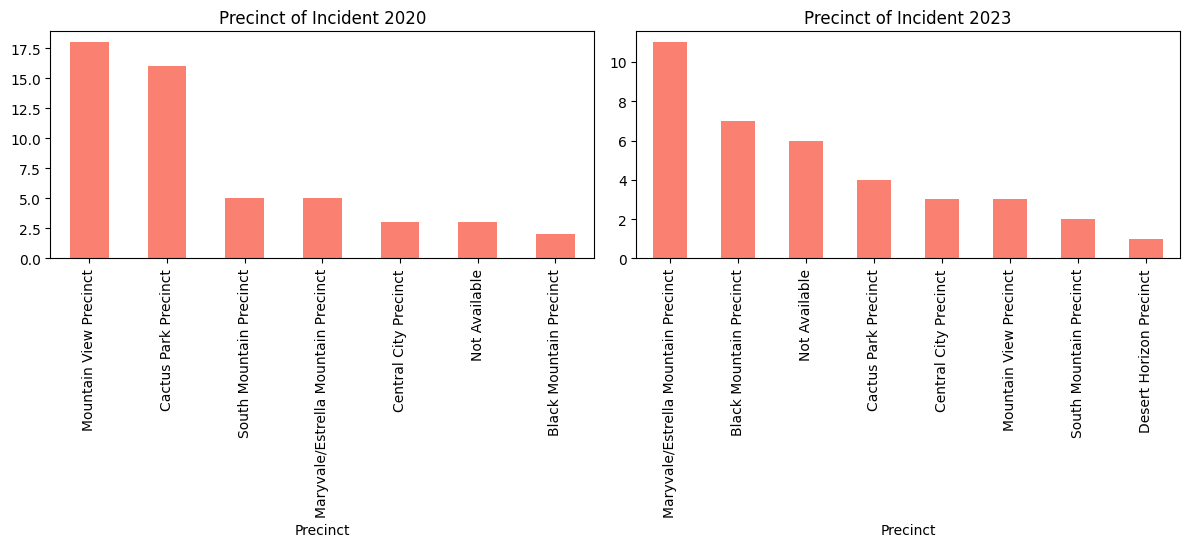

In [78]:
# plotting precinct of incident for 2020 & 2023
plt.figure(figsize=(12, 8))

# 2020
plt.subplot(2, 2, 1)
incident_analysis20['PRECINCT'].value_counts().plot(kind='bar', color='salmon')
plt.title('Precinct of Incident 2020')
plt.xlabel('Precinct')

# 2023
plt.subplot(2, 2, 2)
incident_analysis23['PRECINCT'].value_counts().plot(kind='bar', color='salmon')
plt.title('Precinct of Incident 2023')
plt.xlabel('Precinct')

plt.tight_layout()
plt.show()

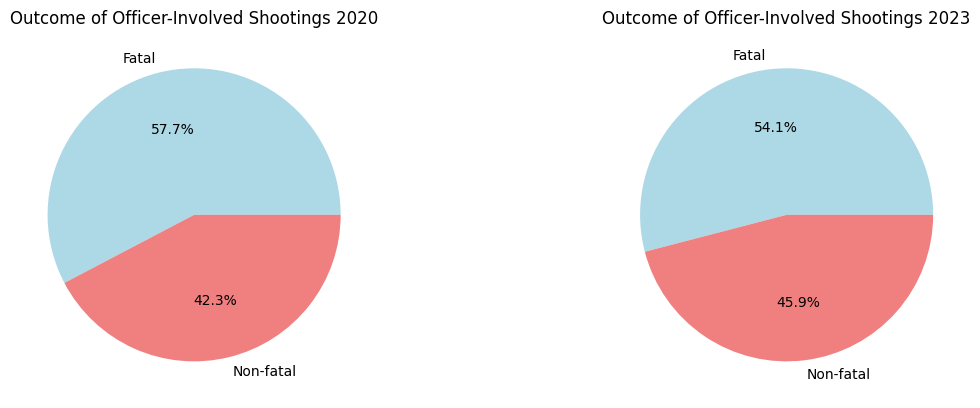

In [85]:
# varibles for outcome analysis for 2020 & 2023
outcome_analysis20 = ois_2020['FATALITY_FLG'].value_counts()
outcome_analysis23 = ois_2023['FATALITY_FLG'].value_counts()

plt.figure(figsize=(12, 8))

# 2020
plt.subplot(2, 2, 1)
outcome_analysis20.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Outcome of Officer-Involved Shootings 2020')
plt.ylabel('')

# 2023
plt.subplot(2, 2, 2)
outcome_analysis23.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Outcome of Officer-Involved Shootings 2023')
plt.ylabel('')

plt.tight_layout()
plt.show()

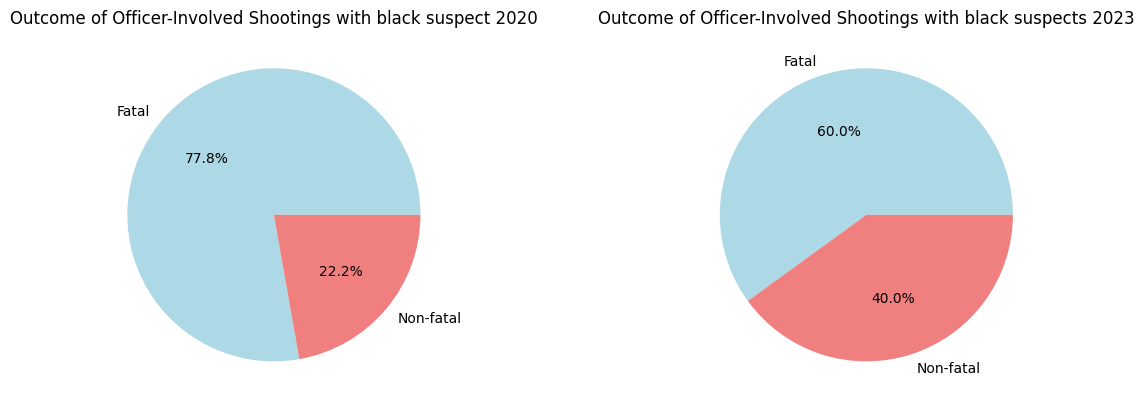

In [43]:
# varibles for outcome analysis for 2020 & 2023
black_suspects_2020 = ois_2020[ois_2020['SP_RACE'] == 'Black']
black_suspects_2023 = ois_2023[ois_2023['SP_RACE'] == 'Black']
outcome_analysis20_blksp = black_suspects_2020['FATALITY_FLG'].value_counts()
outcome_analysis23_blksp = black_suspects_2023['FATALITY_FLG'].value_counts()

# plotting outcome analysis
plt.figure(figsize=(12, 8))

# 2020
plt.subplot(2, 2, 1)
outcome_analysis20_blksp.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Outcome of Officer-Involved Shootings with black suspect 2020')
plt.ylabel('')

# 2023
plt.subplot(2, 2, 2)
outcome_analysis23_blksp.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Outcome of Officer-Involved Shootings with black suspects 2023')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
# variables for shootings per month 2020
ois_2020['DATE'] = pd.to_datetime(ois_2020['DATE'])
ois_2020['Year'] = ois_2020['DATE'].dt.year
ois_2020['Month'] = ois_2020['DATE'].dt.month
shootings_per_month_2020 = ois_2020.groupby('Month').size()

# variables for shootings per month 2023
ois_2023['DATE'] = pd.to_datetime(ois_2023['DATE'])
ois_2023['Year'] = ois_2023['DATE'].dt.year
ois_2023['Month'] = ois_2023['DATE'].dt.month
shootings_per_month_2023 = ois_2023.groupby('Month').size()

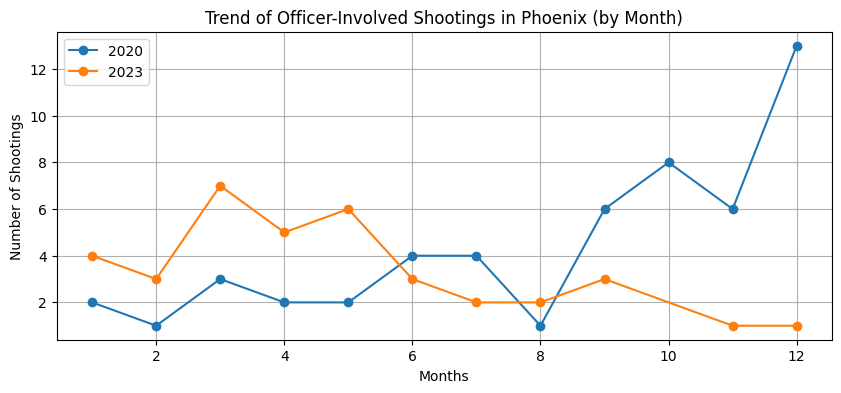

In [71]:
# plotting the trend per month for 2020 & 2023
plt.figure(figsize=(10,4))

# 2020
plt.plot(shootings_per_month_2020.index, shootings_per_month_2020.values, marker='o', linestyle='-', label='2020')

# 2023
plt.plot(shootings_per_month_2023.index, shootings_per_month_2023.values, marker='o', linestyle='-', label='2023')

plt.title('Trend of Officer-Involved Shootings in Phoenix (by Month)')
plt.xlabel('Months')
plt.ylabel('Number of Shootings')
plt.grid(True)
plt.legend()

plt.show()

In [32]:
# checking to see if there is a correlation between being black and the incident resulting in a fatality
black_suspects = ois[ois['SP_RACE'] == 'Black']

contingency_table = pd.crosstab(black_suspects['FATALITY_FLG'], black_suspects['SP_RACE'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square value:", chi2)
print("P-value:", p)

# Interpret the results
alpha = 0.05  # significance level
if p < alpha:
    print("There is a significant association between suspect's race being Black and fatality.")
else:
    print("There is no significant association between suspect's race being Black and fatality.")

Chi-square value: 0.0
P-value: 1.0
There is no significant association between suspect's race being Black and fatality.


Based on the data I have gathered, there has been a decrease in the number of officer-involved incidents in Phoenix since 2020, specifically when the suspect is black. Furthermore, the number of fatalities in such incidents also involving a black suspect has decreased. However, there is no correlation between the race of the suspect and the likelihood of a fatal outcome. I believe this finding is significant enough to warrant further investigation in other states and across the country.